<a href="https://colab.research.google.com/github/ra-vb/python_code/blob/main/Ass_model_rabiya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
data=pd.read_csv('/content/titanic_dataset .csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [207]:
df=data.copy()

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [209]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [210]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [211]:
categorical_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [212]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [213]:
#mode_value = df['categorical_cols'].mode()[0]  # mode() returns a Series, so take the first element
#df['categorical_cols'].fillna(mode_value, inplace=True)
mode_value=df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_value,inplace=True)
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [214]:
mode_cabin = df['Cabin'].mode()[0]
df['Cabin'].fillna(mode_cabin, inplace=True)

In [215]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

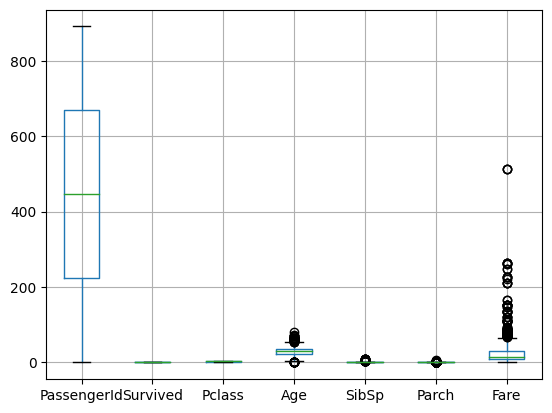

In [216]:
df.boxplot()

In [217]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).sum()
print(outliers)

# Replace outliers with mean
for col in numerical_cols:
    mean_val = df[col].mean()
    df[col] = np.where((df[col] < lower_bound[col]) | (df[col] > upper_bound[col]), mean_val, df[col])


PassengerId      0
Survived         0
Pclass           0
Age             66
SibSp           46
Parch          213
Fare           116
dtype: int64


In [218]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,108,1,22.000000,1.0,0.000000,523,7.250000,47,2
1,2.0,1.0,1.0,190,0,38.000000,1.0,0.000000,596,32.204208,81,0
2,3.0,1.0,3.0,353,0,26.000000,0.0,0.000000,669,7.925000,47,2
3,4.0,1.0,1.0,272,0,35.000000,1.0,0.000000,49,53.100000,55,2
4,5.0,0.0,3.0,15,1,35.000000,0.0,0.000000,472,8.050000,47,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,548,1,27.000000,0.0,0.000000,101,13.000000,47,2
887,888.0,1.0,1.0,303,0,19.000000,0.0,0.000000,14,30.000000,30,2
888,889.0,0.0,3.0,413,0,29.699118,1.0,0.381594,675,23.450000,47,2
889,890.0,1.0,1.0,81,1,26.000000,0.0,0.000000,8,30.000000,60,0


In [238]:
# Normalize numerical features (using MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.000000,0.0,1.0,108,1,0.372549,0.5,0.0,523,0.111538,47,2
1,0.001124,1.0,0.0,190,0,0.686275,0.5,0.0,596,0.495449,81,0
2,0.002247,1.0,1.0,353,0,0.450980,0.0,0.0,669,0.121923,47,2
3,0.003371,1.0,0.0,272,0,0.627451,0.5,0.0,49,0.816923,55,2
4,0.004494,0.0,1.0,15,1,0.627451,0.0,0.0,472,0.123846,47,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.995506,0.0,0.5,548,1,0.470588,0.0,0.0,101,0.200000,47,2
887,0.996629,1.0,0.0,303,0,0.313725,0.0,0.0,14,0.461538,30,2
888,0.997753,0.0,1.0,413,0,0.523512,0.5,1.0,675,0.360769,47,2
889,0.998876,1.0,0.0,81,1,0.450980,0.0,0.0,8,0.461538,60,0


In [220]:
df['Survived'].value_counts()

,count
Survived,
0.0,549
1.0,342


<Axes: xlabel='Survived'>

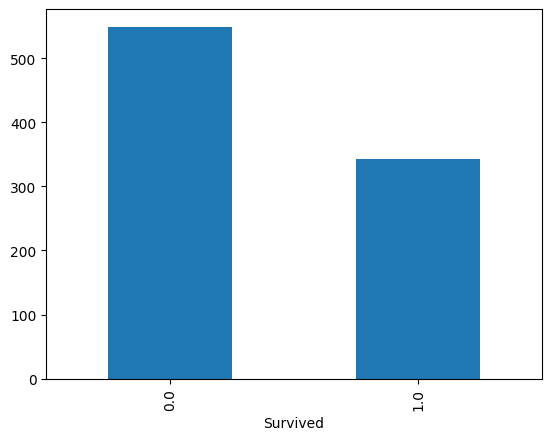

In [221]:
df['Survived'].value_counts().plot(kind='bar')

In [222]:
df['Survived'].value_counts(normalize=True)

,proportion
Survived,
0.0,0.616162
1.0,0.383838


In [223]:
#define x and y
x=df.drop('Survived',axis=1)
y=df['Survived']


In [224]:
#train ad test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [225]:
x_train.shape

(712, 11)

In [226]:
x_test.shape

(179, 11)

**K-NEAREST NEIGHBOUR**

In [227]:
#model creation
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred=classifier.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  metric_k.append(acc)

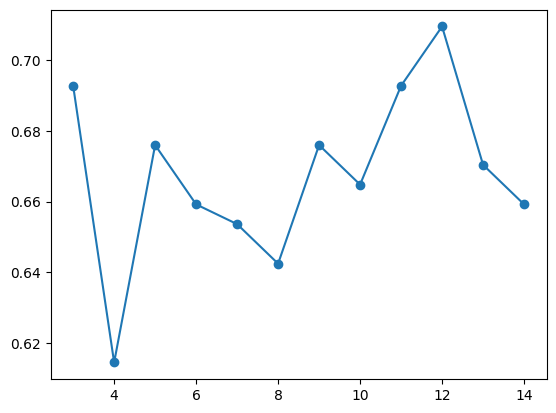

In [228]:
plt.plot(neighbors,metric_k,'o-')

In [229]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred=classifier.predict(x_test)
  acc=accuracy_score(y_test,y_pred)

In [230]:
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred))
print('Recall is', recall_score(y_test, y_pred))
print('f1 score is', f1_score(y_test,y_pred))

Accuracy is 0.6759776536312849
Precision is 0.6290322580645161
Recall is 0.527027027027027
f1 score is 0.5735294117647058


**CROSS VALIDATION** KNN

K FOLD CROSS VALIDATION

In [240]:
from sklearn.model_selection import KFold

In [241]:
kfold_val=KFold(5)

In [242]:
for train_index,test_index in kfold_val.split(x,y):
  print('training index',train_index)
  print('test index',test_index)

training index [179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286
 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304
 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322
 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340
 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358
 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376
 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394
 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412
 413 414 415 416 417 418 419 420 421

In [244]:
from sklearn.model_selection import cross_val_score
kv_result=cross_val_score(classifier,x,y,cv=kfold_val)

In [245]:
kv_result

array([0.63687151, 0.62921348, 0.65168539, 0.63483146, 0.65730337])

In [246]:
np.mean(kv_result)

0.6419810432490114

**stratified cross validation**

In [248]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(5)
skfold_result=cross_val_score(classifier,x,y,cv=skfold)

In [249]:
np.mean(skfold_result)

0.6487037850731279

**SVC**

In [231]:
from sklearn.svm import SVC
sv_clf=SVC(kernel='linear')
sv_clf.fit(x_train,y_train)

SVC(kernel='linear')

In [232]:
y_pred=sv_clf.predict(x_test)
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred))
print('Recall is', recall_score(y_test, y_pred))
print('f1 score is', f1_score(y_test,y_pred))

Accuracy is 0.7821229050279329
Precision is 0.7536231884057971
Recall is 0.7027027027027027
f1 score is 0.7272727272727273


**K FOLD CROSS VALIDATION**

In [233]:
from sklearn.model_selection import KFold

In [204]:
kfold_val=KFold(5)

In [234]:
for train_index,test_index in kfold_val.split(x,y):
  print('training index',train_index)
  print('test index',test_index)

training index [179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286
 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304
 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322
 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340
 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358
 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376
 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394
 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412
 413 414 415 416 417 418 419 420 421

**cross validation** SVC

**K-FOLD CROSS VALIDATION**

In [203]:
from sklearn.model_selection import cross_val_score
kv_result=cross_val_score(sv_clf,x,y,cv=kfold_val)

In [235]:
kv_result

array([0.81564246, 0.79775281, 0.78089888, 0.73595506, 0.80337079])

In [236]:
np.mean(kv_result)

0.7867239972380893

**stratified cross validation**

In [ ]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(5)
skfold_result=cross_val_score(sv_clf,x,y,cv=skfold)

In [239]:
np.mean(skfold_result)

0.7867365513778168